# Objectives

- What types of machine learning models perform best on this dataset?
- Which features are most indicative of a poisonous mushroom?

# Imports

In [37]:
import pandas as pd
from scipy import stats
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib.colors import ListedColormap
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LassoCV
from sklearn.feature_selection import SelectFromModel
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# Loading Data &amp; Initial Analysis

In [20]:
mushroom_df = pd.read_csv('mushrooms.csv')
mushroom_df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


- Class p : Poisonous

- Class e : Edible

In [21]:
mushroom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [22]:
mushroom_df.describe(include='all')

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [23]:
mushroom_df['class'].unique()

array(['p', 'e'], dtype=object)

In [24]:
mushroom_df.groupby('class').size()

class
e    4208
p    3916
dtype: int64

In [25]:
mushroom_df.isna().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [26]:
mushroom_df.drop_duplicates(inplace=True)
mushroom_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [27]:
labels = ['Edible', 'Poisonous']
values = [mushroom_df.describe()['class']['freq'], mushroom_df.describe()['class']['count']-mushroom_df.describe()['class']['freq']]
colors = ['green', 'red']

fig = go.Figure(data=[go.Pie(labels=labels, values=values, opacity=0.8)])
fig.update_traces(textinfo='percent+label', marker=dict(line=dict(color='#000000', width=2), colors=colors))
fig.update_layout(title_text='Distribution of the Mushrooms by their Classes', title_x=0.5, title_font=dict(size=28))
fig.show()

Text(0.5, 1.0, 'Distribution of the Mushrooms by their Classes and Cap Shapes')

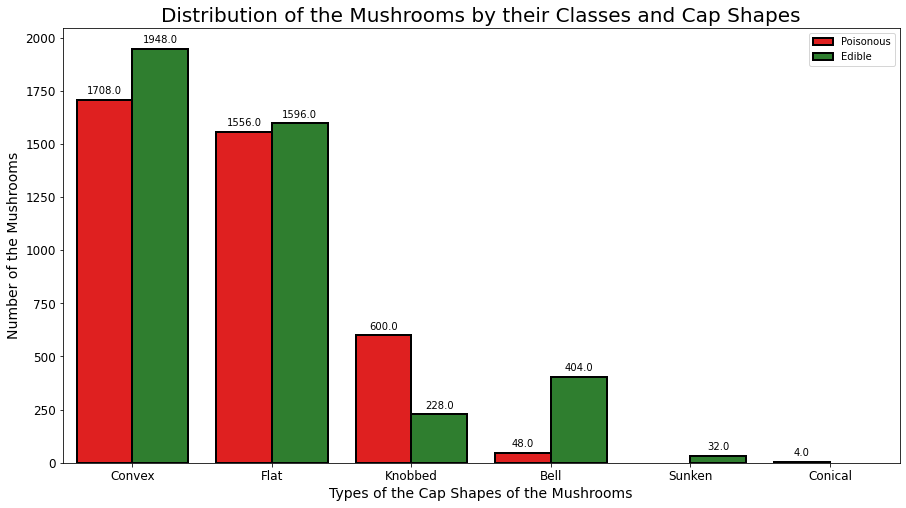

In [28]:
plt.figure(figsize=(15, 8))
splot = sns.countplot(data=mushroom_df, x='cap-shape',
                      hue='class',
                      order=mushroom_df['cap-shape'].value_counts().index,
                      palette=['red', 'forestgreen'],
                      edgecolor=(0, 0, 0),
                      linewidth=2)
                      
splot.set_xticklabels(['Convex', 'Flat', 'Knobbed', 'Bell', 'Sunken', 'Conical'])

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 9),
                   textcoords='offset points')
                   
plt.legend(['Poisonous', 'Edible'], loc='upper right')
plt.ylabel('Number of the Mushrooms', fontsize=14)
plt.xlabel('Types of the Cap Shapes of the Mushrooms', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Distribution of the Mushrooms by their Classes and Cap Shapes', fontsize=20)

Text(0.5, 1.0, 'Distribution of the Mushrooms by their Classes and Cap Surfaces')

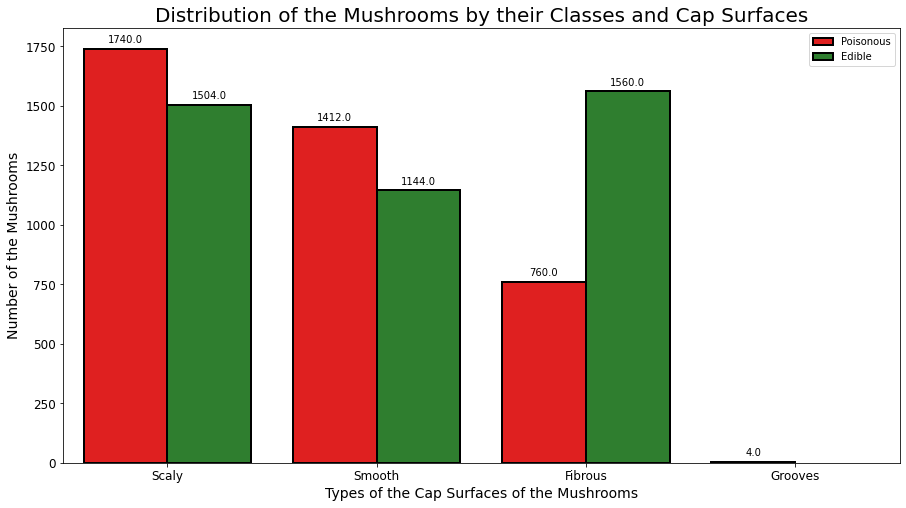

In [29]:
plt.figure(figsize=(15, 8))
splot = sns.countplot(data=mushroom_df, x='cap-surface',
                      hue='class',
                      order=mushroom_df['cap-surface'].value_counts().index,
                      palette=['red', 'forestgreen'],
                      edgecolor=(0, 0, 0),
                      linewidth=2)
                      
splot.set_xticklabels(['Scaly', 'Smooth', 'Fibrous', 'Grooves'])

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 9),
                   textcoords='offset points')
                   
plt.legend(['Poisonous', 'Edible'], loc='upper right')
plt.ylabel('Number of the Mushrooms', fontsize=14)
plt.xlabel('Types of the Cap Surfaces of the Mushrooms', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Distribution of the Mushrooms by their Classes and Cap Surfaces', fontsize=20)

Text(0.5, 1.0, 'Distribution of the Mushrooms by their Classes and Cap Colors')

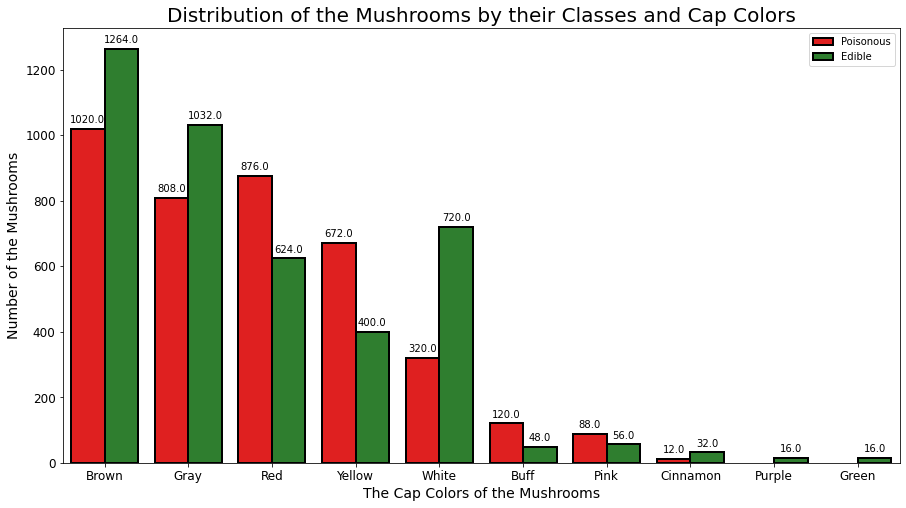

In [30]:
plt.figure(figsize=(15, 8))
splot = sns.countplot(data=mushroom_df, x='cap-color',
                      hue='class',
                      order=mushroom_df['cap-color'].value_counts().index,
                      palette=['red', 'forestgreen'],
                      edgecolor=(0, 0, 0),
                      linewidth=2)
                      
splot.set_xticklabels(['Brown', 'Gray', 'Red', 'Yellow', 'White', 'Buff', 'Pink', 'Cinnamon', 'Purple', 'Green'])

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 9),
                   textcoords='offset points')
                   
plt.legend(['Poisonous', 'Edible'], loc='upper right')
plt.ylabel('Number of the Mushrooms', fontsize=14)
plt.xlabel('The Cap Colors of the Mushrooms', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Distribution of the Mushrooms by their Classes and Cap Colors', fontsize=20)

Text(0.5, 1.0, 'Distribution of the Mushrooms by their Classes and Bruises')

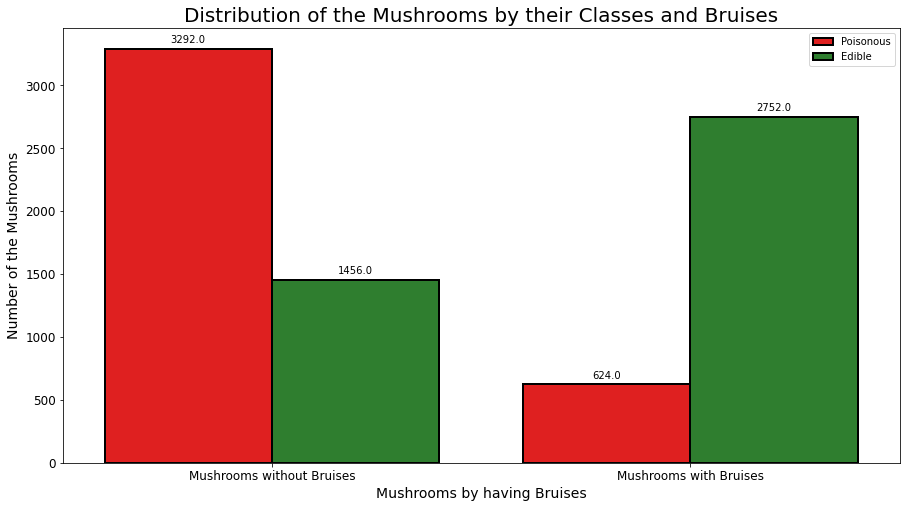

In [31]:
plt.figure(figsize=(15, 8))
splot = sns.countplot(data=mushroom_df, x='bruises',
                      hue='class',
                      order=mushroom_df['bruises'].value_counts().index,
                      palette=['red', 'forestgreen'],
                      edgecolor=(0, 0, 0),
                      linewidth=2)
                      
splot.set_xticklabels(['Mushrooms without Bruises', 'Mushrooms with Bruises'])

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 9),
                   textcoords='offset points')
                   
plt.legend(['Poisonous', 'Edible'], loc='upper right')
plt.ylabel('Number of the Mushrooms', fontsize=14)
plt.xlabel('Mushrooms by having Bruises', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Distribution of the Mushrooms by their Classes and Bruises', fontsize=20)

Text(0.5, 1.0, 'Distribution of the Mushrooms by their Classes and Odor')

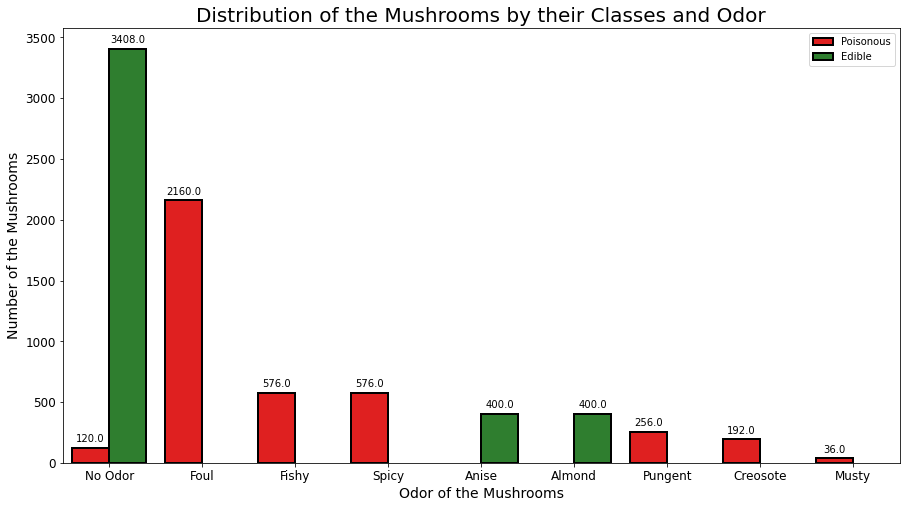

In [32]:
plt.figure(figsize=(15, 8))
splot = sns.countplot(data=mushroom_df, x='odor',
                      hue='class',
                      order=mushroom_df['odor'].value_counts().index,
                      palette=['red', 'forestgreen'],
                      edgecolor=(0, 0, 0),
                      linewidth=2)
                      
splot.set_xticklabels(['No Odor', 'Foul', 'Fishy', 'Spicy', 'Anise', 'Almond', 'Pungent',
                       'Creosote', 'Musty'])

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 9),
                   textcoords='offset points')
                   
plt.legend(['Poisonous', 'Edible'], loc='upper right')
plt.ylabel('Number of the Mushrooms', fontsize=14)
plt.xlabel('Odor of the Mushrooms', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Distribution of the Mushrooms by their Classes and Odor', fontsize=20)

Text(0.5, 1.0, 'Distribution of the Mushrooms by their Classes and Habitats')

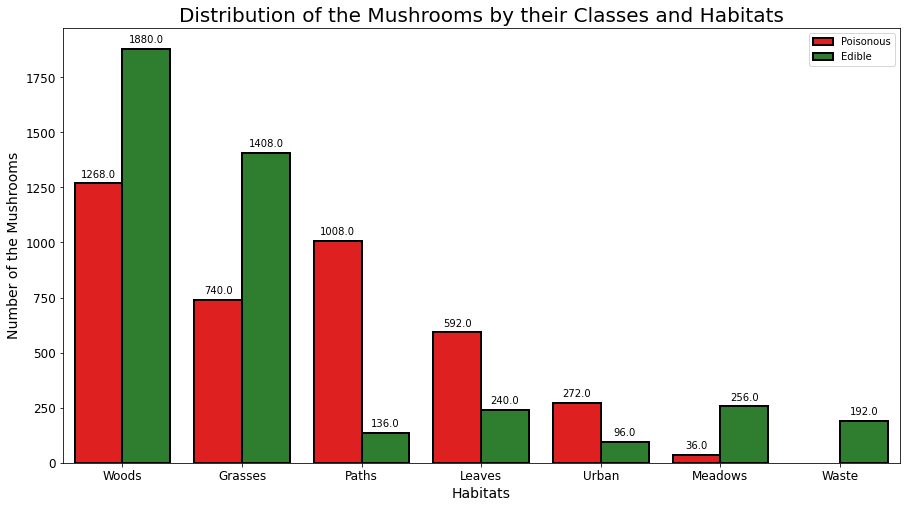

In [33]:
plt.figure(figsize=(15, 8))
splot = sns.countplot(data=mushroom_df, x='habitat',
                      hue='class',
                      order=mushroom_df['habitat'].value_counts().index,
                      palette=['red', 'forestgreen'],
                      edgecolor=(0, 0, 0),
                      linewidth=2)

splot.set_xticklabels(['Woods', 'Grasses', 'Paths', 'Leaves', 'Urban', 'Meadows', 'Waste'])

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 9),
                   textcoords='offset points')
plt.legend(['Poisonous', 'Edible'], loc='upper right')
plt.ylabel('Number of the Mushrooms', fontsize=14)
plt.xlabel('Habitats', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Distribution of the Mushrooms by their Classes and Habitats', fontsize=20)

<AxesSubplot:>

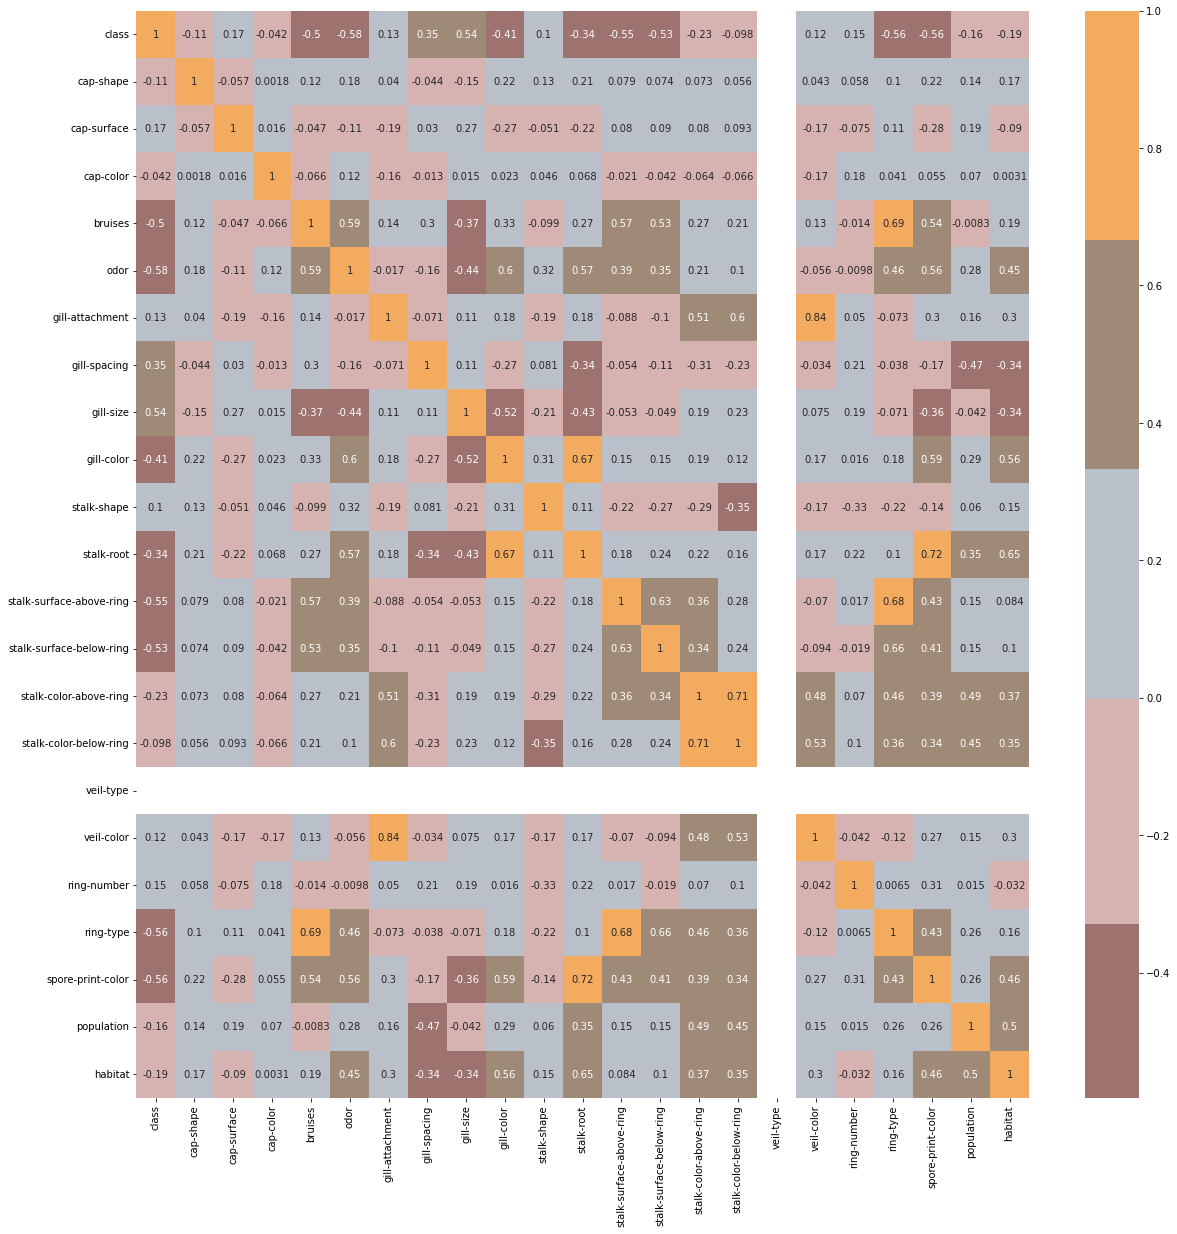

In [38]:
# Checking correlation between features 
corr_mat = mushroom_df.apply(lambda x : pd.factorize(x)[0]).corr(method='pearson', min_periods=1)
plt.figure(figsize=(20,20))  
cmap = colors.ListedColormap(["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"])
sns.heatmap(corr_mat,annot=True, cmap=cmap, center=0)

# Train Test Split

In [39]:
# We start by encoding our categorial variables to make them numerical
LE=LabelEncoder()
for cols in mushroom_df.columns:
    mushroom_df[cols] = LE.fit_transform(mushroom_df[cols])
 
mushroom_df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


After LE is applied :
- Class 0 : Edible
- Class 1 : Poisonous

In [40]:
# Setting the class as the target variable
X = mushroom_df.drop(['class'], axis=1)
y = mushroom_df['class']

# Using only LabelEncoder might confuse our model into thinking that a column has data with some kind of order or hierarchy when we clearly don’t have it. 
# To avoid this, we OneHotEncode columns using get_dummies
cols = X.columns
X = pd.get_dummies(X, columns=cols)

# Default values : train_size = 0.75, test_size = 0.25
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, stratify=None, random_state=5)

print(f'Train set shape : {X_train.shape}')
print(f'Test set shape : {X_test.shape}')

Train set shape : (6093, 117)
Test set shape : (2031, 117)


In [41]:
# Scaling data between -1 and 1
standard_scaler = StandardScaler().fit(X_train)
X_train = standard_scaler.transform(X_train)
X_test = standard_scaler.transform(X_test)

# Gaussian Naive Bayes

In [42]:
naive_model = GaussianNB()
naive_model.fit(X_train, y_train)

GaussianNB()

In [43]:
y_actu = naive_model.predict_proba(X_test)[:,1]
y_pred = naive_model.predict(X_test)
naive_model.score(X_test, y_pred)

1.0

In [44]:
print(f'Number of mislabeled points : {(y_test != y_pred).sum()}')

Number of mislabeled points : 227


In [45]:
# Calculating the accuracy score of our naive model
naive_score = cross_val_score(naive_model, X, y, cv=10, scoring='accuracy')
naive_score.mean()

0.9147033428462363

In [46]:
# Creating the confusion matrix
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)
confusion_matrix

Predicted,0,1,All
Actual,,,
0,341,184,525
1,43,1463,1506
All,384,1647,2031


In [47]:
# Some metrics on our classified datas
# Precision is the ratio of the correctly positive labeled to all positive labeled :  TP/(TP+FP)
# Recall (or Sensitivity) is the ratio of the correctly positive labeled to all who are positive in reality : TP/(TP+FN)
# F1-score is the harmonic mean (average) of precision and recall : 2*(Recall * Precision) / (Recall + Precision)
target_names = ['class 0', 'class 1']
auc_roc = metrics.classification_report(y_test, y_pred, target_names=target_names)
print(auc_roc)

              precision    recall  f1-score   support

     class 0       0.89      0.65      0.75       525
     class 1       0.89      0.97      0.93      1506

    accuracy                           0.89      2031
   macro avg       0.89      0.81      0.84      2031
weighted avg       0.89      0.89      0.88      2031



In [48]:
# AUC explain how well the classifier is able to distinguish between all the Positive and the Negative class points correctly
# The closer to 1 the better it is
auc_roc = metrics.roc_auc_score(y_test, y_pred)
print(auc_roc)

0.8104856763422501


In [49]:
# ROC curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, y_actu, pos_label=1)
roc_auc = auc(fpr1, tpr1)

# ROC curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

roc_auc

0.8215879339783723

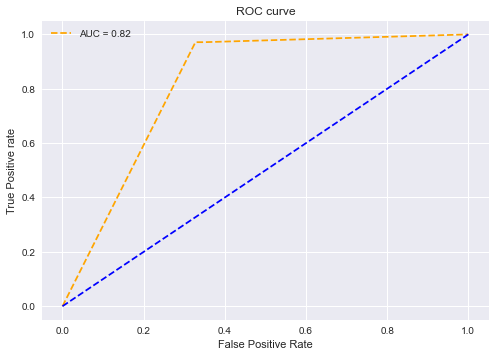

In [50]:
# Plot ROC curves
plt.style.use('seaborn')
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label = 'AUC = %0.2f' % roc_auc)
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')

plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')

plt.show()

# Logistic Regression

In [51]:
LR_model = LogisticRegression()
LR_model.fit(X_train, y_train)

LogisticRegression()

In [52]:
y1_actu = LR_model.predict_proba(X_test)[:,1]
y_pred = LR_model.predict(X_test)
LR_model.score(X_test, y_pred)

1.0

In [53]:
print(f'Number of mislabeled points : {(y_test != y_pred).sum()}')

Number of mislabeled points : 21


In [54]:
# Calculating the accuracy score of our LR model
LR_score = cross_val_score(LR_model, X, y, cv=10, scoring='accuracy')
LR_score.mean()

0.9677588327607414

In [55]:
# Creating the confusion matrix
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)
confusion_matrix

Predicted,0,1,All
Actual,,,
0,513,12,525
1,9,1497,1506
All,522,1509,2031


In [56]:
# Some metrics on our classified datas
# Precision is the ratio of the correctly positive labeled to all positive labeled :  TP/(TP+FP)
# Recall (or Sensitivity) is the ratio of the correctly positive labeled to all who are positive in reality : TP/(TP+FN)
# F1-score is the harmonic mean (average) of precision and recall : 2*(Recall * Precision) / (Recall + Precision)
target_names = ['class 0', 'class 1']
auc_roc = metrics.classification_report(y_test, y_pred, target_names=target_names)
print(auc_roc)

              precision    recall  f1-score   support

     class 0       0.98      0.98      0.98       525
     class 1       0.99      0.99      0.99      1506

    accuracy                           0.99      2031
   macro avg       0.99      0.99      0.99      2031
weighted avg       0.99      0.99      0.99      2031



In [57]:
# ROC curve for models
fpr2, tpr2, thresh2 = roc_curve(y_test, y1_actu, pos_label=1)
roc_auc2 = auc(fpr2, tpr2)
roc_auc2

0.9995383545184342

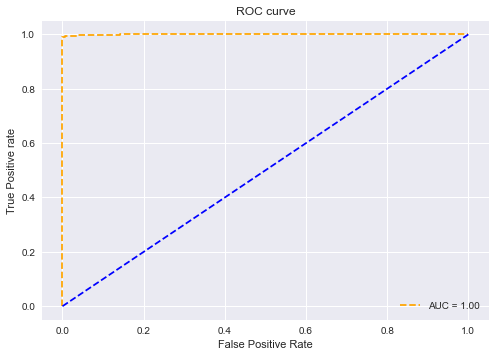

In [58]:
# Plot ROC curves
plt.style.use('seaborn')
plt.plot(fpr2, tpr2, linestyle='--',color='orange', label = 'AUC = %0.2f' % roc_auc2)
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')

plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')

plt.show()

# K-Nearest Neighbors

In [59]:
KNN_model = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
KNN_model.fit(X_train, y_train)

KNeighborsClassifier()

In [60]:
y2_actu = KNN_model.predict_proba(X_test)[:,1]
y_pred = KNN_model.predict(X_test)
KNN_model.score(X_test, y_pred)

1.0

In [61]:
print(f'Number of mislabeled points : {(y_test != y_pred).sum()}')

Number of mislabeled points : 109


In [62]:
# Calculating the accuracy score of our KNN model
KNN_score = cross_val_score(KNN_model, X, y, cv=10, scoring='accuracy')
KNN_score.mean()

0.9580437048212846

In [63]:
# Creating the confusion matrix
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)
confusion_matrix

Predicted,0,1,All
Actual,,,
0,428,97,525
1,12,1494,1506
All,440,1591,2031


In [64]:
# Some metrics on our classified datas
# Precision is the ratio of the correctly positive labeled to all positive labeled :  TP/(TP+FP)
# Recall (or Sensitivity) is the ratio of the correctly positive labeled to all who are positive in reality : TP/(TP+FN)
# F1-score is the harmonic mean (average) of precision and recall : 2*(Recall * Precision) / (Recall + Precision)
target_names = ['class 0', 'class 1']
auc_roc = metrics.classification_report(y_test, y_pred, target_names=target_names)
print(auc_roc)

              precision    recall  f1-score   support

     class 0       0.97      0.82      0.89       525
     class 1       0.94      0.99      0.96      1506

    accuracy                           0.95      2031
   macro avg       0.96      0.90      0.93      2031
weighted avg       0.95      0.95      0.94      2031



In [65]:
# ROC curve for models
fpr3, tpr3, thresh3 = roc_curve(y_test, y2_actu, pos_label=1)
roc_auc3 = auc(fpr3, tpr3)
roc_auc3

0.9830266236640738

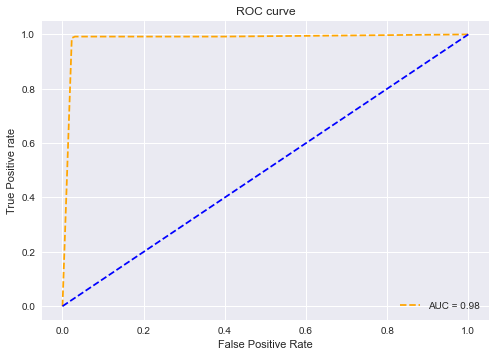

In [66]:
# Plot ROC curves
plt.style.use('seaborn')
plt.plot(fpr3, tpr3, linestyle='--',color='orange', label = 'AUC = %0.2f' % roc_auc3)
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')

plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')

plt.show()

# Support Vector Machine

In [67]:
SVM_model = SVC(kernel = 'rbf', random_state = 0, probability=True)
SVM_model.fit(X_train, y_train)

SVC(probability=True, random_state=0)

In [68]:
y3_actu = SVM_model.predict_proba(X_test)[:,1]
y_pred = SVM_model.predict(X_test)
SVM_model.score(X_test, y_pred)

1.0

In [69]:
print(f'Number of mislabeled points : {(y_test != y_pred).sum()}')

Number of mislabeled points : 42


In [70]:
# Calculating the accuracy score of our SVM model
SVM_score = cross_val_score(SVM_model, X, y, cv=10, scoring='accuracy')
SVM_score.mean()

0.9584131629493635

In [71]:
# Creating the confusion matrix
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)
confusion_matrix

Predicted,0,1,All
Actual,,,
0,522,3,525
1,39,1467,1506
All,561,1470,2031


In [72]:
# Some metrics on our classified datas
# Precision is the ratio of the correctly positive labeled to all positive labeled :  TP/(TP+FP)
# Recall (or Sensitivity) is the ratio of the correctly positive labeled to all who are positive in reality : TP/(TP+FN)
# F1-score is the harmonic mean (average) of precision and recall : 2*(Recall * Precision) / (Recall + Precision)
target_names = ['class 0', 'class 1']
auc_roc = metrics.classification_report(y_test, y_pred, target_names=target_names)
print(auc_roc)

              precision    recall  f1-score   support

     class 0       0.93      0.99      0.96       525
     class 1       1.00      0.97      0.99      1506

    accuracy                           0.98      2031
   macro avg       0.96      0.98      0.97      2031
weighted avg       0.98      0.98      0.98      2031



In [73]:
# ROC curve for models
fpr4, tpr4, thresh4 = roc_curve(y_test, y3_actu, pos_label=1)
roc_auc4 = auc(fpr4, tpr4)
roc_auc4

0.9976487699993676

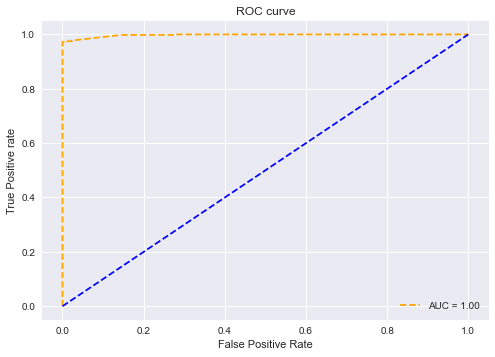

In [74]:
# Plot ROC curves
plt.style.use('seaborn')
plt.plot(fpr4, tpr4, linestyle='--',color='orange', label = 'AUC = %0.2f' % roc_auc4)
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')

plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')

plt.show()

# Random Forest

In [75]:
RF_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=1)
RF_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, random_state=1)

In [76]:
y5_actu = RF_model.predict_proba(X_test)[:,1]
y_pred = RF_model.predict(X_test)
RF_model.score(X_test, y_pred)

1.0

In [77]:
print(f'Number of mislabeled points : {(y_test != y_pred).sum()}')

Number of mislabeled points : 28


In [78]:
# Calculating the accuracy score of our RF model
RF_score = cross_val_score(RF_model, X, y, cv=10, scoring='accuracy')
RF_score.mean()

0.9650634092547822

In [79]:
# Creating the confusion matrix
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)
confusion_matrix

Predicted,0,1,All
Actual,,,
0,505,20,525
1,8,1498,1506
All,513,1518,2031


In [80]:
# Some metrics on our classified datas
# Precision is the ratio of the correctly positive labeled to all positive labeled :  TP/(TP+FP)
# Recall (or Sensitivity) is the ratio of the correctly positive labeled to all who are positive in reality : TP/(TP+FN)
# F1-score is the harmonic mean (average) of precision and recall : 2*(Recall*Precision)/(Recall+Precision)
target_names = ['class 0', 'class 1']
auc_roc = metrics.classification_report(y_test, y_pred, target_names=target_names)
print(auc_roc)

              precision    recall  f1-score   support

     class 0       0.98      0.96      0.97       525
     class 1       0.99      0.99      0.99      1506

    accuracy                           0.99      2031
   macro avg       0.99      0.98      0.98      2031
weighted avg       0.99      0.99      0.99      2031



In [81]:
# ROC curve for models
fpr5, tpr5, thresh5 = roc_curve(y_test, y5_actu, pos_label=1)
roc_auc5 = auc(fpr5, tpr5)
roc_auc5

0.9989363182191868

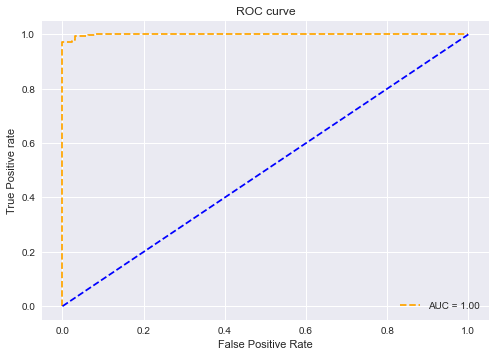

In [82]:
# Plot ROC curves
plt.style.use('seaborn')
plt.plot(fpr5, tpr5, linestyle='--',color='orange', label = 'AUC = %0.2f' % roc_auc5)
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')

plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')

plt.show()

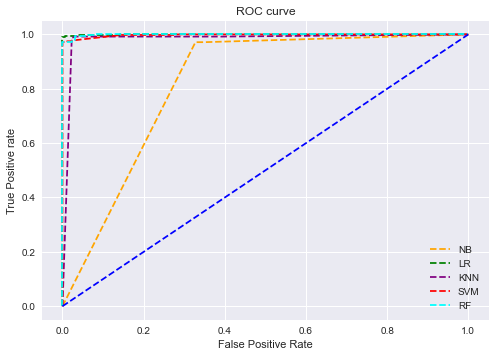

In [83]:
# Lets print all ROC curves on one plot
plt.style.use('seaborn')

# Plot ROC curves
plt.plot(fpr1, tpr1, linestyle='--', color='orange', label='NB')
plt.plot(fpr2, tpr2, linestyle='--', color='green', label='LR')
plt.plot(fpr3, tpr3, linestyle='--', color='purple', label='KNN')
plt.plot(fpr4, tpr4, linestyle='--', color='red', label='SVM')
plt.plot(fpr5, tpr5, linestyle='--', color='cyan', label='RF')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')

plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')

plt.show()

# Best performing algorithm

In [84]:
# Accuracy vs AUC
# To determine which algorithm is the best, we need to choose a metric to compare them to
# Accuracy shows the percentage of the correct classifications with respect to all the samples
# But it does not say anything about the performances for negative and positive classes
# This is why AUC is a better metric to compare our models

print(f'NB AUC : {roc_auc}')
print(f'LR AUC : {roc_auc2}')
print(f'KNN AUC : {roc_auc3}')
print(f'SVM AUC : {roc_auc4}')
print(f'RF AUC : {roc_auc5}')

NB AUC : 0.8215879339783723
LR AUC : 0.9995383545184342
KNN AUC : 0.9830266236640738
SVM AUC : 0.9976487699993676
RF AUC : 0.9989363182191868


# Feature selection

In [85]:
# We use the embedded method with a Lasso regularization to determine which features are relevant or not

reg = LassoCV()
reg.fit(X, y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X,y))
coef = pd.Series(reg.coef_, index = X.columns)

Best alpha using built-in LassoCV: 0.000195
Best score using built-in LassoCV: 0.997096


In [86]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 51 variables and eliminated the other 66 variables


Text(0.5, 1.0, 'Feature importance using Lasso Model')

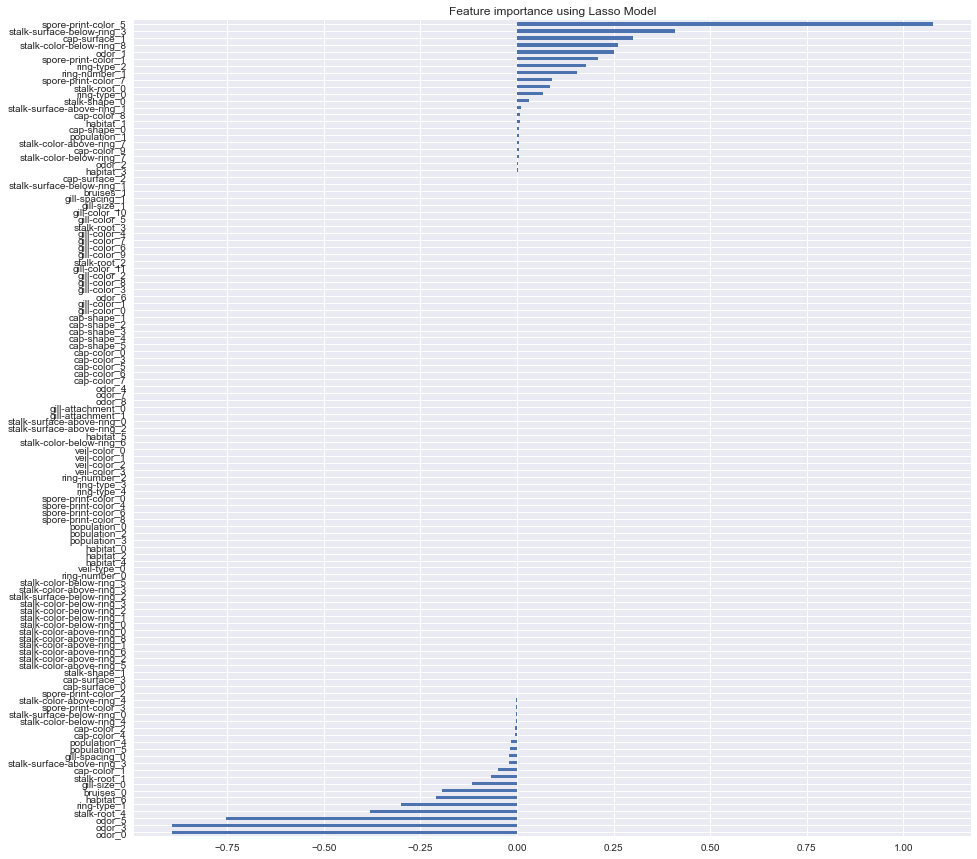

In [87]:
# Features with positive coefficient are relevant and those with negative coefficient are not
imp_coef = coef.sort_values()
plt.rcParams['figure.figsize'] = (15, 15)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=4ec1ac06-5e67-4a2a-9a45-1852c75c2431' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>